<a href="https://colab.research.google.com/github/ankurmalik1978/Bird_Identification/blob/main/Bird_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Fastdownload is part of fast.ai
2.   ! is used to tell that its a shell command and not a python code



In [1]:
!pip install fastai
!pip install fastdownload
!pip install duckduckgo-search
!pip install fastcore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

**Use duckduckgo_search to search for birds photos online**

In [2]:
from fastcore.all import *
from duckduckgo_search import DDGS

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

**Downloads Image under the URL to "dest"**

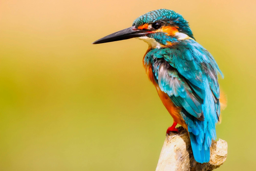

In [4]:
from fastdownload import download_url
dest = 'bird'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

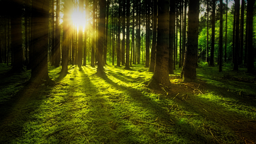

In [27]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [5]:
searches = 'forest','bird'
path = Path('bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

DataBlock

Very important concept in Fast.ai is the concept of DataBlock:
DataSet: A collection of data items where each item is a tuple containing the input and corresponding label, representing the raw data before being split into batches

DataLoader : An iterator that provides data in batches by taking a Dataset and allowing you to iterate through it efficiently, often with additional features like shuffling and batching

DataBlock : A tool to define the steps involved in creating a Dataset and DataLoader, including how to get items from your data source, split data into train/validation sets, and apply transformations


Example for DataBlock:

	1. blocks : This tells fast.ai what kind of model to build
		a. Input: What kind of input do we have. There are various kinds of Blocks in Fast.ai for various types of inputs for e.g. ImageBlock
		b. Output: What is Output. For e.g. "CategoryBlock" which means that its 1 of the number of possibilities
	2.  get_items:
		a. What are the items used for the training. Over here we could pass a function
	For e.g. get_image_files() which is part of fars
	3. We need to put aside some data for the model validation. Fast.ai would not allow to train without this
	For e.g.
		RandomSplitter(valid_pct=0.2, seed=42)
			This would randomly set aside 20% of data for validation
	4. How do we tell Fast.ai what is the correct label of the photo for e.g. whether its bird photo or forest photo

	We have downloaded files under following folder structure:



	"parent_label" function returns the parent folder of the path. In this case, it would be either bird or forest

	5. Most computer vision architectures need all images of the same size.
	with "items_tfms", we could run transformation on every item

	item_tfms = [Resize(192, method='squish')]

	With this, we will resize the images to 192*192
	There are different ways to Resize, either you crop or squish


	All of the above is passed to a DataLoader which iterates over it in batches


	dls = DataBlock(
	    blocks=(ImageBlock, CategoryBlock),
	    get_items=get_image_files,
	    splitter=RandomSplitter(valid_pct=0.2, seed=42),
	    get_y=parent_label,
	    item_tfms=[Resize(192, method='squish')]
	).dataloaders(path, bs=32)


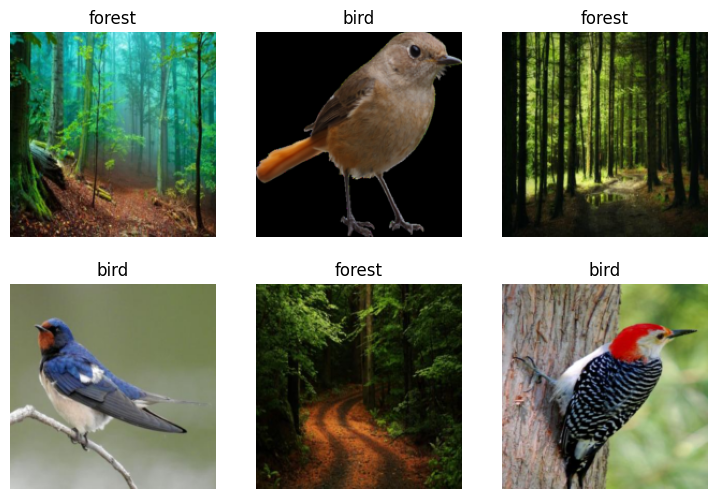

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Now we're ready to train our model. The fastest widely used computer vision model is resnet18. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

We call vision-learner and pass in Model Type and DataBlock

fastai comes with a helpful fine_tune() method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

	learn = vision_learner(dls, resnet18, metrics=error_rate)
	learn.fine_tune(3)

When we run above we see that model is getting downloaded. Somone has already trained this model over 1m images and they then made those weights available over the internet. By default, fast.ai downloads already available weights

"fine_tune" method takes those weights and adjust them for our data


https://timm.fast.ai/
`timm` is a deep-learning library created by Ross Wightman and is a collection of SOTA computer vision models
Fast.ai integrates with timm and can use any of the pytorch image modesl

We in our example make use of "resnet"

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 51.9MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.687846,0.233396,0.041667,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.051273,0.047303,0.013889,01:00
1,0.036617,0.022129,0.013889,00:58
2,0.022675,0.024950,0.013889,01:02


In [14]:
is_bird,_,probs = learn.predict(PILImage.create('bird'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.3f}")

This is a: bird.0
Probability it's a bird: 1.000
